# IA PROJECT 2: LOAN APPROVAL

## Loan Dataset Features

| Variable                         | Description                                                                                 | Data Type     |
|----------------------------------|---------------------------------------------------------------------------------------------|---------------|
| `person_age`                     | Person's age                                                                                | Float         |
| `person_gender`                  | Person's gender                                                                             | Categorical   |
| `person_education`              | Highest education level                                                                     | Categorical   |
| `person_income`                  | Annual income                                                                              | Float         |
| `person_emp_exp`                 | Years of work experience                                                                   | Integer       |
| `person_home_ownership`          | Home ownership status (e.g., rent, own, mortgage)                                          | Categorical   |
| `loan_amnt`                      | Requested loan amount                                                                      | Float         |
| `loan_intent`                    | Loan purpose                                                                               | Categorical   |
| `loan_int_rate`                  | Loan interest rate                                                                         | Float         |
| `loan_percent_income`            | Loan amount as a percentage of annual income                                               | Float         |
| `cb_person_cred_hist_length`     | Length of credit history in years                                                          | Float         |
| `credit_score`                   | Person's credit score (The higher the score, the lower the assumed risk of default)        | Integer       |
| `previous_loan_defaults_on_file` | Indicator of previous loan defaults                                                        | Categorical   |
| `loan_status` (label)           | Loan approval status: 1 = approved; 0 = rejected                                            | Integer       |

For this dataset, we can address both a regression problem—predicting the `credit_score` —and a classification problem using the `loan_status` feature to determine whether the loan will be approved or not.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Dataset
df = pd.read_csv('dataset.csv')
df.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

No nulls in the dataset

In [4]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [5]:
df['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

It can be observed that the label in our dataset is imbalanced.

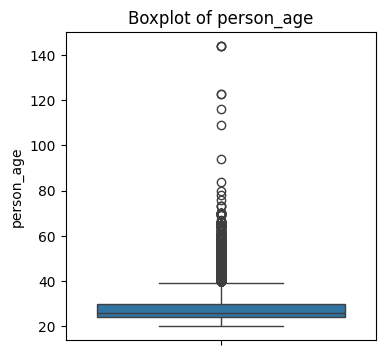

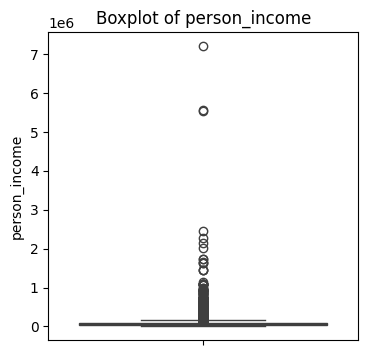

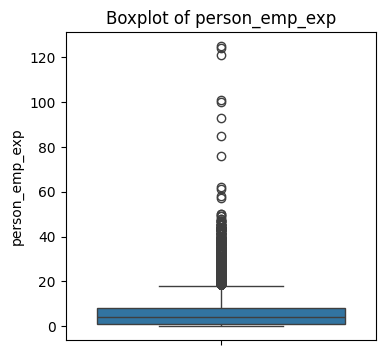

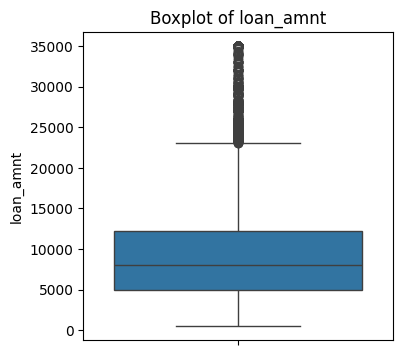

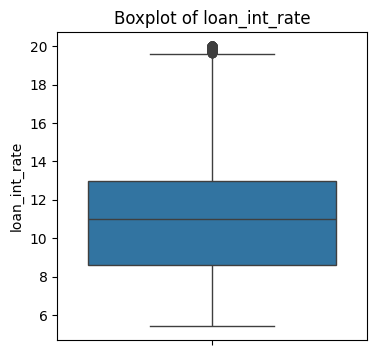

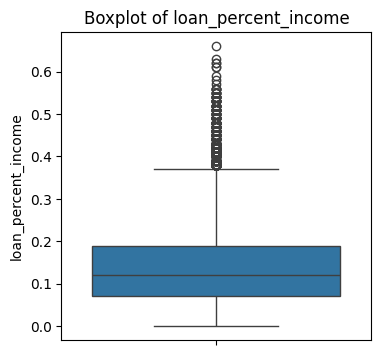

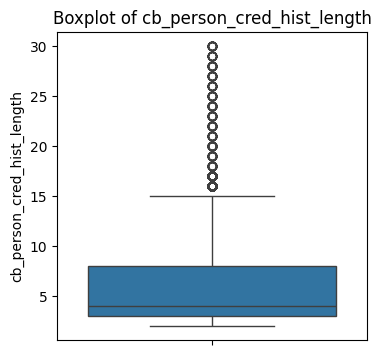

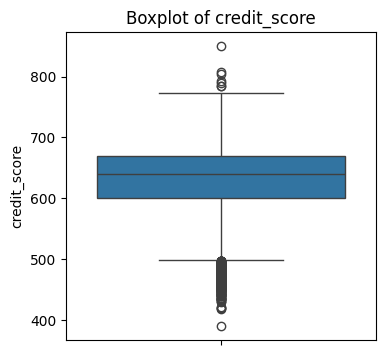

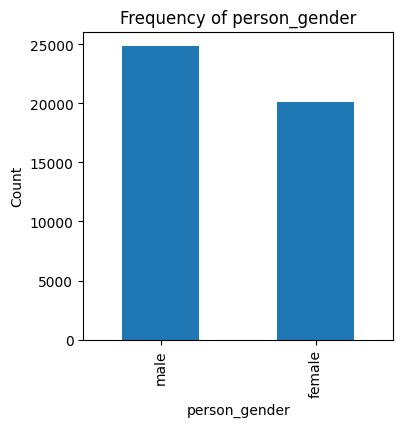

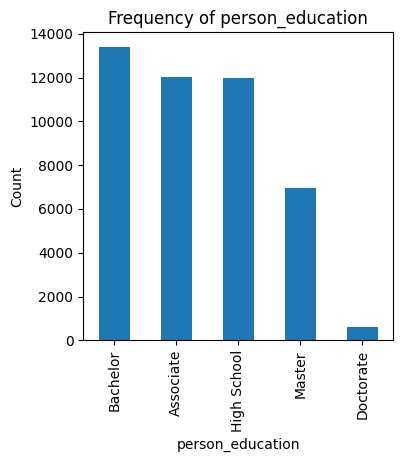

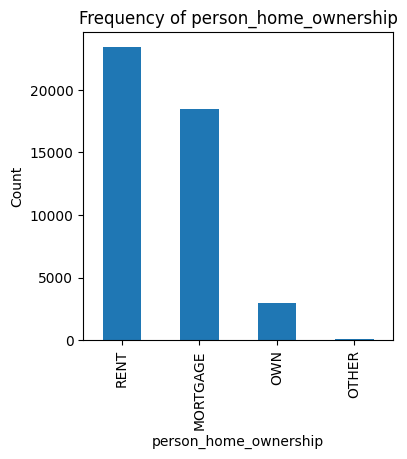

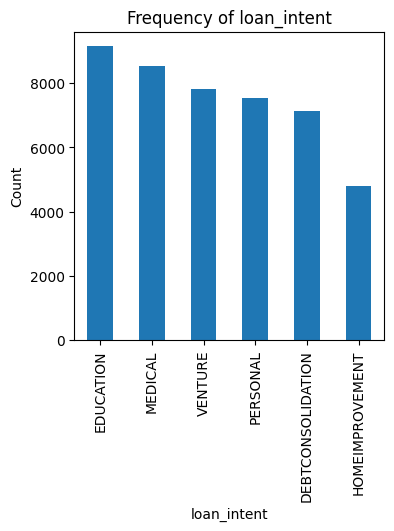

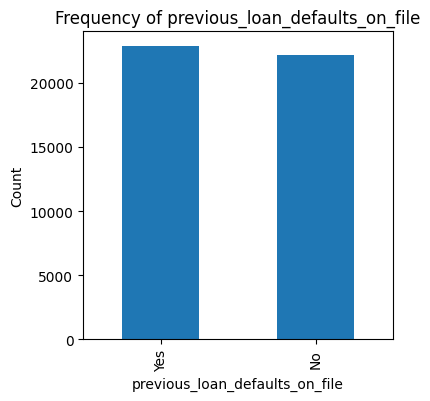

In [6]:
# Select numeric columns, excluding 'loan_status'
numeric_cols = [col for col in df.select_dtypes(include=['number']).columns if col != 'loan_status']

# 1. Boxplots for numeric variables (excluding 'loan_status')
for col in numeric_cols:
    plt.figure(figsize=(4, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# 2. Bar charts for categorical variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(4, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Frequency of {col}")
    plt.ylabel("Count")
    plt.show()

## BASIC ANN MODEL WITHOUT CLEANING DATASET (ONLY NaNs)

### Pre-process the data

In [7]:
# Import libraries
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torchsummary import summary

import numpy as np
import matplotlib.pyplot as plt

In [8]:
# set random seed for reproducibility
torch.manual_seed(42)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



# 'loan_status' is the target column
y = df["loan_status"]
X = df.drop(["loan_status"], axis=1)

# Encode categorical columns 
categorical_cols = X.select_dtypes(include=["object", "category"]).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))


# Convert to numpy arrays
X = X.values
y = y.values

# Split the data into train, val, and test

# First split: test = 20%, train_val = 80%
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Second split: of the remaining 80%, 10% goes to val => 90% train, 10% val
# (10% of 80% is 8% total)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, 
    y_train_val,
    test_size=0.1,   # 10% of the remaining 80%
    random_state=42
)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# 4. Convert numpy arrays to PyTorch tensors

X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

X_val_t = torch.tensor(X_val, dtype=torch.float32)
y_val_t = torch.tensor(y_val, dtype=torch.float32)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)


# 5. Create TensorDatasets and DataLoaders

train_dataset = TensorDataset(X_train_t, y_train_t)
val_dataset   = TensorDataset(X_val_t, y_val_t)
test_dataset  = TensorDataset(X_test_t, y_test_t)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



In [10]:
X_train_t[0], y_train_t[0]

(tensor([-0.4558,  0.9052,  0.8469, -0.5471, -0.8907,  0.9075,  0.4112,  0.2782,
          0.1548,  2.7583, -0.4798, -0.6508, -1.0144]),
 tensor(1.))

### Design the network

In [11]:
class LoanApprovalANN(nn.Module):
    def __init__(self, input_size):
        super(LoanApprovalANN, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),  # First hidden layer (input -> 64)
            nn.ReLU(),
            nn.Linear(128, 64),  # Second hidden layer (64 -> 32)
            nn.ReLU(),
            nn.Linear(64,32),  # Output layer (32 -> 1)
            nn.ReLU(),
            nn.Linear(32,1),  # Output layer (32 -> 1)
            nn.Sigmoid()  # Activation for binary classification
        )

    def forward(self, x):
        return self.model(x)


### Initialize the model

In [12]:
input_size = X_train_t.shape[1]  # Number of features
model = LoanApprovalANN(input_size)


In [13]:
# Model summary
summary(model, (input_size,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]           1,792
              ReLU-2                  [-1, 128]               0
            Linear-3                   [-1, 64]           8,256
              ReLU-4                   [-1, 64]               0
            Linear-5                   [-1, 32]           2,080
              ReLU-6                   [-1, 32]               0
            Linear-7                    [-1, 1]              33
           Sigmoid-8                    [-1, 1]               0
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.05
Estimated Total Size (MB): 0.05
----------------------------------------------------------------


In [14]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

LoanApprovalANN(
  (model): Sequential(
    (0): Linear(in_features=13, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

In [15]:
import torch.optim as optim

# Define loss function
criterion = nn.BCELoss()  # Binary Cross Entropy Loss

# Define optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=0.005)


### Train the network

In [16]:
import torch

# Define device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Store training history
train_loss_history = []
valid_loss_history = []
train_accuracy_history = []
valid_accuracy_history = []

# Number of epochs
num_epochs = 25

def get_accuracy(preds, labels):
    """Calculate accuracy given model predictions and actual labels."""
    preds = (preds >= 0.5).float()  # Convert to binary values (0 or 1)
    return (preds == labels).sum().item() / labels.size(0)

for epoch in range(num_epochs):
    # Training phase
    model.train()
    for i, (X_batch, y_batch) in enumerate(train_loader):

        # Move data to device
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Clear gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(X_batch).squeeze()

        # Compute loss
        loss = criterion(y_pred, y_batch)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

    # Calculate accuracy & loss for training and validation
    train_loss = 0
    valid_loss = 0
    train_accuracy = 0
    valid_accuracy = 0

    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch).squeeze()
            train_loss += criterion(y_pred, y_batch).item()
            train_accuracy += get_accuracy(y_pred, y_batch)

        train_loss_history.append(train_loss / len(train_loader))
        train_accuracy_history.append(train_accuracy / len(train_loader))

        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch).squeeze()
            valid_loss += criterion(y_pred, y_batch).item()
            valid_accuracy += get_accuracy(y_pred, y_batch)

        valid_loss_history.append(valid_loss / len(val_loader))
        valid_accuracy_history.append(valid_accuracy / len(val_loader))

    # Print epoch summary
    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train loss: {train_loss/len(train_loader):.3f} | "
          f"Train accuracy: {train_accuracy/len(train_loader):.3f} | "
          f"Valid loss: {valid_loss/len(val_loader):.3f} | "
          f"Valid accuracy: {valid_accuracy/len(val_loader):.3f}")


Epoch 1/25 | Train loss: 0.214 | Train accuracy: 0.902 | Valid loss: 0.216 | Valid accuracy: 0.903
Epoch 2/25 | Train loss: 0.199 | Train accuracy: 0.908 | Valid loss: 0.189 | Valid accuracy: 0.910
Epoch 3/25 | Train loss: 0.195 | Train accuracy: 0.910 | Valid loss: 0.191 | Valid accuracy: 0.911
Epoch 4/25 | Train loss: 0.193 | Train accuracy: 0.912 | Valid loss: 0.192 | Valid accuracy: 0.912
Epoch 5/25 | Train loss: 0.190 | Train accuracy: 0.915 | Valid loss: 0.186 | Valid accuracy: 0.911
Epoch 6/25 | Train loss: 0.186 | Train accuracy: 0.916 | Valid loss: 0.181 | Valid accuracy: 0.917
Epoch 7/25 | Train loss: 0.185 | Train accuracy: 0.916 | Valid loss: 0.183 | Valid accuracy: 0.918
Epoch 8/25 | Train loss: 0.183 | Train accuracy: 0.915 | Valid loss: 0.180 | Valid accuracy: 0.916
Epoch 9/25 | Train loss: 0.183 | Train accuracy: 0.918 | Valid loss: 0.183 | Valid accuracy: 0.916
Epoch 10/25 | Train loss: 0.192 | Train accuracy: 0.915 | Valid loss: 0.197 | Valid accuracy: 0.914
Epoch 11/

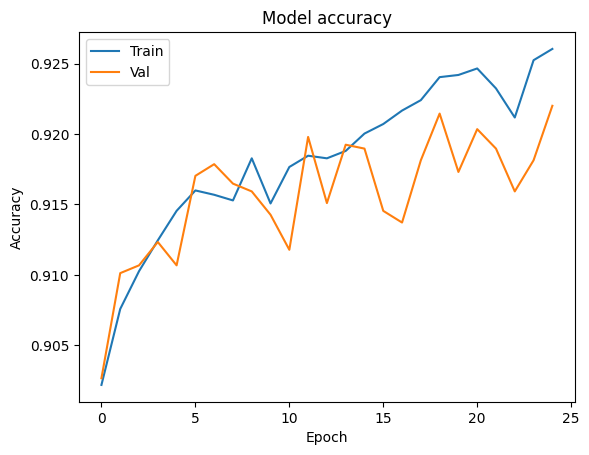

In [17]:
# Plot training and validation accuracy
plt.plot(train_accuracy_history)
plt.plot(valid_accuracy_history)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

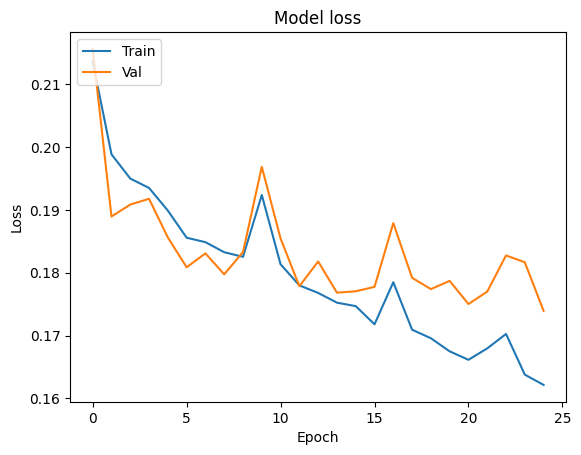

In [18]:
# Plot training and validation accuracy
plt.plot(train_loss_history)
plt.plot(valid_loss_history)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### Evaluate the model

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set model to evaluation mode
model.eval()

# Initialize variables for metrics
test_loss = 0.0
all_preds = []
all_labels = []

# No need to track gradients during evaluation
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        y_pred = model(X_batch).squeeze()

        # Compute loss
        loss = criterion(y_pred, y_batch)
        test_loss += loss.item()

        # Convert predictions to binary (0 or 1)
        predicted = (y_pred >= 0.5).float()

        # Store predictions and labels for metrics calculation
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

# Compute average test loss
avg_test_loss = test_loss / len(test_loader)

# Compute classification metrics
test_accuracy = accuracy_score(all_labels, all_preds)
test_precision = precision_score(all_labels, all_preds)
test_recall = recall_score(all_labels, all_preds)
test_f1 = f1_score(all_labels, all_preds)

# Print results
print(f"Test Loss: {avg_test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")


Test Loss: 0.1954
Test Accuracy: 0.9163
Test Precision: 0.8501
Test Recall: 0.7592
Test F1 Score: 0.8021


# PREGUNTAR POR QUE OSCILA TANTO LA GRAFICA DE LA PRECISION